# Multi-Class Classification with Perceptron

Lab Assignment from [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import gzip
import random

You can use the following perceptron training code from the lecture:

In [125]:
def train(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # initialize weights

    
    pos_count = np.array(positive_examples).shape[0]
    neg_count = np.array(negative_examples).shape[0]
    
    report_frequency = 10
    
    for i in range(num_iterations):
        pos = positive_examples[np.random.choice(pos_count)]
        neg = negative_examples[0][np.random.choice(neg_count)]
        print(neg)

        z = np.dot(pos, weights)   
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
            
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct,neg_correct))

    return weights

In [126]:
def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    return (res.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))

accuracy(wts, test_x, test_labels)

NameError: name 'wts' is not defined

### Reading the Dataset

This code download the dataset from the repository on the internet. You can also manually copy the dataset from `/data` directory of AI Curriculum repo.

In [127]:
!rm *.pkl
https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz
!gzip -d mnist.pkl.gz

SyntaxError: invalid syntax (830526663.py, line 2)

In [128]:
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)

FileNotFoundError: [Errno 2] No such file or directory: 'mnist.pkl'

In [129]:
# If you are not running this notebook from a cloned repository, you may need to grab the binary dataset file first
#!wget https://github.com/microsoft/AI-For-Beginners/blob/main/data/mnist.pkl.gz?raw=true
# In this case correct the link to the dataset below as well.
file_path = r'c:\Users\nakam\Downloads\mnist.pkl.gz'  # Use raw string (r'...')
with gzip.open(file_path, 'rb') as mnist_pickle:
    mnist_tuple= pickle.load(mnist_pickle, encoding='latin1')
MNIST = {
    'Train': {'Features': mnist_tuple[0][0], 'Labels': mnist_tuple[0][1]},
    'Valid': {'Features': mnist_tuple[1][0], 'Labels': mnist_tuple[1][1]},
    'Test': {'Features': mnist_tuple[2][0], 'Labels': mnist_tuple[2][1]},
}


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01171875 0.0703125
 0.0703125  0.0703125  0.4921875  0.53125    0.68359375 0.1015625
 0.6484375  0.99609375 0.96484375 0.49609375 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1171875  0.140625
 0.3671875  0.6015625 ]
5


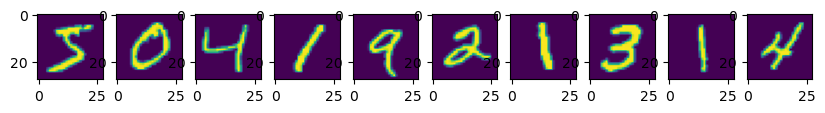

In [130]:
print(MNIST['Train']['Features'][0][130:180])
print(MNIST['Train']['Labels'][0])
features = MNIST['Train']['Features'].astype(np.float32) / 256.0
labels = MNIST['Train']['Labels']
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    plt.imshow(features[i].reshape(28,28))
plt.show()

Code to create *one-vs-other* dataset for two-digit classification. You need to modify this code to create *one-vs-all* dateset.

In [131]:
def set_mnist_pos_neg(label,neg_list = None):
    if neg_list is None:
        neg_list = []  # Initialize if not provided
    positive_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j == label]
    negative_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j != label]

    positive_images = MNIST['Train']['Features'][positive_indices]
    negative_images = MNIST['Train']['Features'][negative_indices]

    neg_list.append(negative_images)


    return positive_images, neg_list

In [132]:
# Dictionary to store weights for each label
weights_matrix = [] 

for label in range(1, 10):  # Loop from 1 to 9
    neg_list = None
    pos, neg = set_mnist_pos_neg(label,neg_list)
    weight_list = train(pos, neg, 100)  # Store weights
    weights_matrix.append(weight_list.flatten())  # Flatten the weight and append to list

# Convert list of weights into a 2D matrix (rows: labels, columns: weight values)
weights_matrix = np.array(weights_matrix)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [133]:
def classify(input):
    vector = np.dot(weights_matrix,input)
    index = np.argmax(vector)

    return index

In [134]:
y_true = []
y_pred = []

# Evaluate on the test set
for i in range(len(MNIST['Test']['Labels'])):
    true_label = MNIST['Test']['Labels'][i]
    input_image = MNIST['Test']['Features'][i]
    
    predicted_label = classify(input_image)

    y_true.append(true_label)
    y_pred.append(predicted_label)

# Accuracy
accuracy = np.mean(np.array(y_true) == np.array(y_pred)) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 8.20%


Now you need to:
1. Create 10 *one-vs-all* datasets for all digits
1. Train 10 perceptrons
1. Define `classify` function to perform digit classification
1. Measure the accuracy of classification and print *confusion matrix*
1. [Optional] Create improved `classify` function that performs the classification using one matrix multiplication.